# Libraries

In [ ]:
# Custom libraries
import environment as uno

# Public libraries
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

sns.set()

SyntaxError: ignored

In [ ]:
def bold(string):
    chr_start = "\033[1m"
    chr_end = "\033[0m"
    print (chr_start + string + chr_end)
    
def underline(string):
    chr_start = "\033[4m"
    chr_end = "\033[0m"
    print(chr_start + string + chr_end)

In [ ]:
def color_lib(categories):
    """
    This function generates a dictionary that assigns a specific color from a color spectrum to each fund.
    It enables consistent coloring across visualizations.
    """
    
    c_scale = cm.rainbow(np.linspace(0,1,len(categories)))
    c_dict = {}

    for i,c in zip(categories,c_scale):
        c_dict[i] = c
        
    return c_dict

# Parameters

In [ ]:
# Widgets for settings
widg_sim       = widgets.IntText(value = 100, description = "Simulations:")
widg_algo      = widgets.Dropdown(options=["monte-carlo","q-learning"], value="monte-carlo", description="Algorithm:")
widg_new_model = widgets.Dropdown(options=[True,False], value=True, description="New Model:")
widg_comment   = widgets.Dropdown(options=[True,False], value=False, description="Show Game:")

# Widgets for parameters
widg_epsilon = widgets.FloatSlider(value=0.2, min=0, max=1, step=0.01, description="Epsilson:", readout_format=".2f")
widg_step    = widgets.FloatSlider(value=0.2, min=0, max=1, step=0.01, description="Step Size:", readout_format=".2f")

underline ("General Settings:")
display(widg_sim)
display(widg_algo)
display(widg_new_model)
display(widg_comment)

underline ("\nModel Parameters:")
display(widg_epsilon)
display(widg_step)

General Settings:


IntText(value=100, description='Simulations:')

Dropdown(description='Algorithm:', options=('monte-carlo', 'q-learning'), value='monte-carlo')

Dropdown(description='New Model:', options=(True, False), value=True)

Dropdown(description='Show Game:', index=1, options=(True, False), value=False)


Model Parameters:


FloatSlider(value=0.2, description='Epsilson:', max=1.0, step=0.01)

FloatSlider(value=0.2, description='Step Size:', max=1.0, step=0.01)

# Running the Game

In [ ]:
winners, turns, coverage = list(), list(), list()

In [ ]:
# Agent parameters
agent_info = {"epsilon"  : widg_epsilon.value, 
              "step_size": widg_step.value, 
              "new_model": widg_new_model.value}


# Run simulations
run = uno.tournament(iterations = widg_sim.value,
                     algo       = widg_algo.value,
                     comment    = widg_comment.value,
                     agent_info = agent_info)


winners.extend(run[0])
turns.extend(run[1])
coverage.extend(run[2])

  0%|          | 0/100 [00:00<?, ?it/s]

Execution lasted 0.27 minutes (6.13 games per second)


# Analysis

In [ ]:
winners.count("Bernhard")/len(winners)

0.51

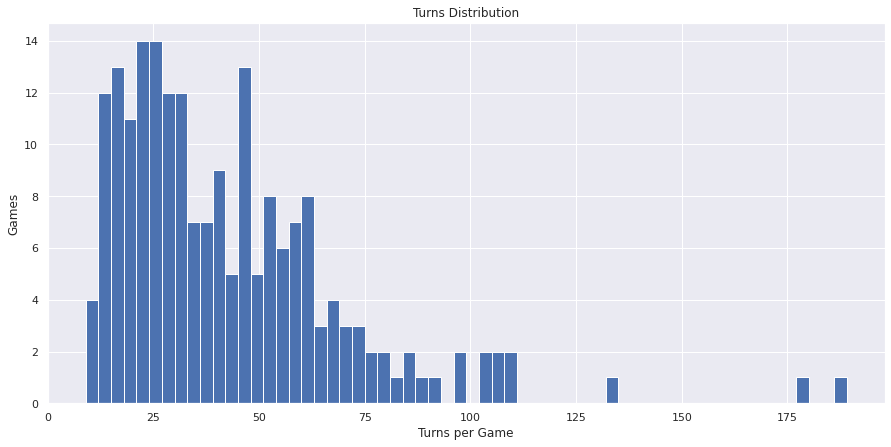

In [ ]:
fig = plt.figure(1, figsize=(15,7))

plt.hist(turns, bins =60, edgecolor = "w")
plt.title("Turns Distribution")
plt.xlabel("Turns per Game")
plt.ylabel("Games")

plt.show()

In [ ]:
result = pd.concat([pd.Series(winners), pd.Series(turns)], axis = 1)
result = result.rename(columns={0:"Winner",1:"Turns"})

result["Win_rate"] = result["Winner"].apply(lambda x: 1 if x == "Bernhard" else 0)
result["Win_rate"] = result["Win_rate"].cumsum()/(result.index+1)

result.tail()

,Winner,Turns,Win_rate
195,Bernhard,84,0.515306
196,Magdalena,98,0.512690
197,Magdalena,15,0.510101
198,Magdalena,14,0.507538
199,Bernhard,56,0.510000
